In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors

In [4]:
# Carregando o dataset
df = pd.read_csv('/Users/italolopes/Downloads/spotify.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [6]:
# Fazendo uma cópia do DataFrame
df1 = df.copy()
df1.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [7]:
df2 = df.copy()
df2.head()  

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [8]:
df2.shape

(170653, 19)

In [9]:
source = df2['artists']
source.head()

0    ['Sergei Rachmaninoff', 'James Levine', 'Berli...
1                                       ['Dennis Day']
2    ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...
3                                     ['Frank Parker']
4                                       ['Phil Regan']
Name: artists, dtype: object

In [10]:
df_num = df2.select_dtypes(include=['float64', 'int64']).copy()

In [11]:
# ================== PARTE 1: TF-IDF EM 'artists' ==================
# Ideia: transformar a coluna de artistas (texto) em números (vetores) usando TF-IDF.
# - fillna(''): troca NaN por string vazia (evita erro)
# - astype(str): garante que tudo é string
artists = df2['artists'].fillna('').astype(str)  

# Configura o TF-IDF:
# - analyzer='char': trabalha com caracteres (bom para nomes curtos/variações)
# - ngram_range=(3,5): usa blocos de 3 a 5 caracteres (ex.: "rih", "riha", "rihan")
# - lowercase=True: normaliza para minúsculas
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3,5), lowercase=True)
X_art = vectorizer.fit_transform(artists)

def recommend_by_artist(name, top_k=10):
    # Transforma o nome do artista digitado pelo usuário em um vetor
    consulta = vectorizer.transform([name])

  # Calcula similaridade do artista digitado com TODOS os artistas do dataset
    #    cosine_similarity retorna valores de 0 a 1 (quanto maior, mais parecido)
    similaridades = cosine_similarity(consulta, X_art).ravel()

    # Pega os índices dos artistas mais parecidos, em ordem decrescente
    indices = np.argsort(similaridades)[::-1]

    # Cria uma tabela com os resultados
    recomendacoes = pd.DataFrame({
        'artist': artists.iloc[indices].values,

        'similarity': similaridades[indices]
    })

    # Remove o próprio artista da lista e pega só os top_k primeiros
    recomendacoes = recomendacoes[recomendacoes['artist'].str.lower() != name.lower()]
    return recomendacoes.head(top_k).reset_index(drop=True)


num_cols = df2.select_dtypes(include=['float64','int64']).columns
X_num = df2[num_cols].fillna(0).to_numpy()
scaler = StandardScaler(with_mean=False)                 
X_num_scaled = csr_matrix(scaler.fit_transform(X_num))   

# ================== PARTE 4: JUNTANDO TUDO (NUMÉRICO + TF-IDF) ==================
# hstack concatena horizontalmente as matrizes esparsas.
# Resultado: uma matriz única com todas as features.
X_comb = hstack([X_num_scaled, X_art], format='csr')

# 5) Reduz dimensão (tipo PCA para esparso)
svd = TruncatedSVD(n_components=100, random_state=42)
X_FINAL = svd.fit_transform(X_comb)                      

# Testa o sistema de recomendação
print(recommend_by_artist("anitta", top_k=4))
X_FINAL.shape
X_art.shape

                                              artist  similarity
0                             ['Anitta', 'J Balvin']    0.459565
1               ['Anitta', 'Myke Towers', 'Cardi B']    0.340327
2  ['Dalex', 'Lenny Tavárez', 'Anitta', 'Natti Na...    0.214342
3                                         ['Vanity']    0.146095


(170653, 217972)

In [12]:

X_art.shape

(170653, 217972)

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_FINAL)

PCA

In [14]:
# Aplicando PCA nos dados de treino e teste
pca = PCA(n_components=100)
X_music_treinamento_pca = pca.fit_transform(X_FINAL)
x_music_teste_pca = pca.transform(X_FINAL)
X_music_treinamento_pca.shape, x_music_teste_pca.shape


((170653, 100), (170653, 100))

Passar treino

Melhor número de clusters (k): 3
Melhor Silhouette Score: 0.1950


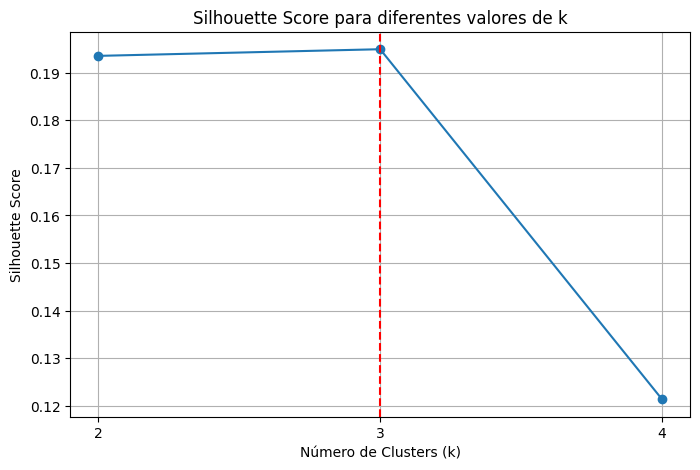

In [16]:
# X_pca -> saída do PCA
X = X_FINAL  # Dados já reduzidos pelo PCA
# testar dimensionalidade com outras listas (150mil / 100 / 50)

ks = range(2, 5)  # Testando k de 2 a 10
silhouette_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Melhor K
best_k = ks[np.argmax(silhouette_scores)]
print(f"Melhor número de clusters (k): {best_k}")
print(f"Melhor Silhouette Score: {max(silhouette_scores):.4f}")
# Destacando o melhor ponto

plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_scores, marker='o')

plt.axvline(x=best_k, color='r', linestyle='--', label=f'Melhor k: {best_k}')

plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de k')
plt.xticks(ks)
plt.grid()
plt.show()  

In [17]:
# confrontando o silhouette score com o k escolhido
k_escolhido = n_clusters = 3  # Substitua pelo valor de k escolhido
kmeans = KMeans(n_clusters=k_escolhido, random_state=0, n_init='auto')
kmeans.fit(x_music_teste_pca)
score = silhouette_score(x_music_teste_pca, kmeans.labels_)
print(f"Silhouette Score para k={k_escolhido}: {score:.4f}")

Silhouette Score para k=3: 0.1019


In [ ]:
# Usando o mesmo dataframe e a matriz reduzida
df_base = df2
X_BASE = X_music_treinamento_pca 

# Garantir que os tamanhos batem
assert len(df_base) == X_BASE.shape[0], "O número de linhas do DF não bate com a matriz."

# Cria o modelo que encontra músicas/artistas mais parecidos
# metric='cosine': mede o quão parecidos os vetores são
# n_neighbors=20: pega os 20 mais próximos
modelo = NearestNeighbors(metric='cosine', n_neighbors=20)
modelo.fit(X_BASE)

def recomendar_artista(nome_artista, top_k=5):
    # Procura todas as músicas que têm o nome do artista digitado
    artistas_encontrados = df_base['artists'].astype(str).str.lower().str.contains(nome_artista.lower(), na=False)
    indices = np.where(artistas_encontrados)[0]

    if len(indices) == 0:
        print(f"Artista '{nome_artista}' não foi encontrado.")
        return pd.DataFrame()

    # Faz a média dos vetores das músicas encontradas desse artista
    artista_dados = X_BASE[indices].mean(axis=0).reshape(1, -1)

    # Busca as músicas mais parecidas com esse "vetor médio"
    distancias, vizinhos = modelo.kneighbors(artista_dados)
    distancias = distancias[0]
    vizinhos = vizinhos[0]

    # Cria uma tabelinha com os resultados
    resultado = pd.DataFrame({
        'Artista': df_base.iloc[vizinhos]['artists'].values,
        'Música': df_base.iloc[vizinhos]['name'].values,
        'ano': df_base.iloc[vizinhos]['year'].values,
        'energy': df_base.iloc[vizinhos]['energy'].values,  
        'Similaridade': (1 - distancias)
       
    })

    media = df_base.iloc[vizinhos]['energy'].values.mean()
    print(f"Média de energy das recomendações: {media:.4f}")
    # Remove o próprio artista e mostra só os melhores
    resultado = resultado[resultado['Artista'].str.lower() != nome_artista.lower()]
    return resultado.head(top_k).reset_index(drop=True)

# Exemplo de uso
print(recomendar_artista("anitta", top_k=5))

Média de energy das recomendações: 0.6584
                                             Artista  \
0                                     ['Mac Miller']   
1                                 ['Eric Bellinger']   
2                               ['Alejandra Guzman']   
3  ['Slim Thug', 'Bun B', 'Chamillionaire', 'Paul...   
4                                     ['Celia Cruz']   

                                     Música   ano  energy  Similaridade  
0                                      Loud  2012   0.822      1.000000  
1  9 Lives (feat. Too $hort, Ty Dolla $ign)  2014   0.690      0.999997  
2                         Eternamente Bella  1996   0.709      0.999995  
3                         Welcome 2 Houston  2009   0.681      0.999992  
4                                  Te Busco  2008   0.332      0.999990  


In [ ]:
recs = recommend_by_artist("Anitta", top_k=4)
print(recs)

                                              artist  similarity
0                             ['Anitta', 'J Balvin']    0.459565
1               ['Anitta', 'Myke Towers', 'Cardi B']    0.340327
2  ['Dalex', 'Lenny Tavárez', 'Anitta', 'Natti Na...    0.214342
3                                         ['Vanity']    0.146095


In [ ]:
print("len(df2)        =", len(df2))
print("X_FINAL.shape   =", X_FINAL.shape)

len(df2)        = 170653
X_FINAL.shape   = (170653, 3)
